# Ключевые слова

Ключевые слова — удобный инструмент обработки текстов. Он позволяет представить длинный текст или набор текстов в виде обозримого списка единиц; выявить понятия, важные конкретно для этого текста; сравнить тексты между собой и т. д.

Есть разные подходы к извлечению ключевых слов. Самый простое, что можно придумать, — подсчитать частотность слов в тексте: что чаще употребляется, то и ключевое. Реализация такого подхода была представлена [на первом занятии](https://colab.research.google.com/drive/1NUUFBZP3vcmFO405p6J4p46rO9aEalT6?usp=sharing#scrollTo=-2c5QCCkXBV9) по Питону.

Очевидно, однако, что этот подход проблематичен: частотными оказываются не слова, свойтсвенные конкретному тексту, а слова, которые часто встречаются в языке. Эта проблема частично решается использованием стоп-слов — но если работать не с коротким узконаправленным текстом, а, например, с художественным произведением, то даже без стоп-слов среди наиболее частотных будет много слов, которые просто употребительны в языке в целом, и не сообщают ничего об особых чертах интересующего нас текста.

Существует ряд более продвинутых инструментов, и два из них рассматриваются в этой тетрадке.

## Предобработка данных

Перед выделением ключевых слов — да и в большинстве других задач — необходимо подготовить текст: токенизировать и лемматизировать для языков с богатой морфологией, токенизировать для языков типа китайского.

Используем простой и быстрый вариант с анализатором, работающем на словаре. 

Также можно использовать для этого обсуждавшуюся раньше библиотеку Stanza; соответствующие функции даются ниже.

In [36]:
%%capture

!pip install pymorphy3
!pip install nltk
import nltk
from pymorphy3 import MorphAnalyzer
analyzer = MorphAnalyzer()

def preproc_simple(text):

  word_list = []

  for i in nltk.tokenize.word_tokenize(text):

      norm_form = analyzer.parse(i)[0].normal_form #Тут используется функция, которая делает морфологический разбор и достаёт лемму
      word_list.append(norm_form)

  return ' '.join(word_list)

In [37]:
preproc_simple('Шла Саша по шоссе.')

'идти саша по шоссе .'

In [6]:
%%capture

#Устанавливаем и импортируем модуль
!pip install stanza
import stanza
#Скачиваем обученную для русского языка модель
#замените на свой язык, если потребуется
stanza.download("ru")
#Загружаем модель; для китайского можно убрать загрузку лемматизации
nlp = stanza.Pipeline(lang="ru", processors="tokenize, lemma")

#Определяем функцию, которая будет выполнять препроцессинг
def preproc(text):
    text_analyzed = nlp(text)
    lemmas = [word.lemma for word in text_analyzed.iter_words()]
    return ' '.join(lemmas)

In [10]:
%%capture

#Вариант для китайского без лемматизации

#Устанавливаем и импортируем модуль
!pip install stanza
import stanza
#Скачиваем обученную для русского языка модель
#замените на свой язык, если потребуется
stanza.download("zh")
#Загружаем модель; для китайского можно убрать загрузку лемматизации
nlp_zh = stanza.Pipeline(lang="zh", processors="tokenize")

#Определяем функцию, которая будет выполнять препроцессинг
def preproc_zh(text):
    text_analyzed = nlp_zh(text)
    words = [word.text for word in text_analyzed.iter_words()]
    return ' '.join(words)

In [11]:
preproc_zh('萨沙一边在高速公路上行走，一边吃着椒盐卷饼')

'萨沙 一边 在 高速 公路 上 行走 ， 一边 吃 着 椒 盐 卷 饼'

## Ключевые слова с контрольным корпусом

Одна группа подходов выделяет ключевые слова, сравнивая текст с некоторой широкой коллекцией текстов — контрольным корпусом (reference corpus).

Если эта коллекция достаточно хорошо представляет собой язык в целом (например, это Национальный корпус языка или его фрагмент), можно говорить о том, что он позволяет учитывать частотность слов в языке в целом.

Другой вариант — взять в качестве контрольного корпуса более узкий набор текстов, на фоне которых хочется выделять ключевые слова. Так, текст Ф. Шеллинга может захотеться сравнить с другими его работами или работами других философов, относящихся к немецкому идеализму.

Ниже приводится код, который воспроизводит выделение ключевых слов на основании статистической метрики, использующей функцию логарифмической вероятности (log likelyhood).

В качестве примера будем использовать текст Фауста; в качестве контрольного корпуса — корпус SynTagRus, который содержит разнохарактерные тексты и может считаться хорошо представляющим русский язык. При применении к другим языкам будет необходимо подобрать контрольный корпус.

In [13]:
#Импортируем модули
import pandas as pd
import numpy as np
import requests
from collections import Counter

In [45]:
#Скачиваем Алису
alice = requests.get('https://raw.githubusercontent.com/alekseyst/text_analysis_2025/refs/heads/main/Practical_4/alisa.txt').text

#Скачиваем SynTagRus
syntagrus = requests.get('https://raw.githubusercontent.com/alekseyst/text_analysis_2025/refs/heads/main/Practical_8/syntagrus_lemmas.txt').text

In [24]:
#Определяем функцию, которая посчитает количество использования
#для каждого слова и добавит их в таблицу
def create_freq_df(corpus):

    freq_dict = Counter(corpus.split())

    return pd.DataFrame(freq_dict.items(), columns=['Word', 'Counts'])

#Определяем функцию, которая совместит две таблицы с частотностями
#и посчитает метрику

def count_metric(corpus_table, ref_corpus_table):
    
    

In [57]:
#Считаем частотности в Алисе
corpus_freqs = create_freq_df(preproc_simple(alice))
#Пример подсчёта частотности в корпусе
corpus_freqs.head()

,Word,Counts
0,льюис,1
1,кэрролл,1
2,приключение,6
3,алиса,451
4,в,418


In [46]:
#Считаем частотности в контрольном корпусе
reference_corpus_freqs = create_freq_df(preproc_simple(syntagrus))

In [92]:
#Функция, которя оценивает "важность" слов в целевом и контрольном корпусах

def ll_keywords(corpus, reference_corpus):
    corpus_size = sum(corpus['Counts'])
    r_corpus_size = sum(reference_corpus['Counts'])
    
    comp_table = pd.merge(corpus, reference_corpus, left_on='Word', right_on='Word', how='outer', suffixes=('', '_ref'))
    
    comp_table = comp_table.assign(Res=lambda x: corpus_size - x.Counts,
                      Res_ref=lambda x: r_corpus_size - x.Counts_ref,
                      Counts_exp=lambda x: ((x.Counts+x.Counts_ref)*(x.Counts+x.Res))/(x.Counts+x.Counts_ref+x.Res+x.Res_ref),
                      Counts_ref_exp=lambda x: ((x.Counts+x.Counts_ref)*(x.Counts_ref+x.Res_ref))/(x.Counts+x.Counts_ref+x.Res+x.Res_ref),
                      Res_exp=lambda x: ((x.Res+x.Res_ref)*(x.Counts+x.Res))/(x.Counts+x.Counts_ref+x.Res+x.Res_ref),
                      Res_ref_exp=lambda x: ((x.Res+x.Res_ref)*(x.Counts_ref+x.Res_ref))/(x.Counts+x.Counts_ref+x.Res+x.Res_ref),
                      Preference=lambda x: np.where(x.Counts > x.Counts_exp , 'corpus', 'ref_corpus'),
                      G2=lambda x: 2*(x.Counts*np.log(x.Counts/x.Counts_exp) + x.Counts_ref*np.log(x.Counts_ref/x.Counts_ref_exp) + x.Res*np.log(x.Res/x.Res_exp) + x.Res_ref*np.log(x.Res_ref/x.Res_ref_exp))).sort_values('G2', ascending=False)

    return comp_table[['Word', 'Preference', 'G2']]

Полученная функция находит слова, которые свойственны одному корпусу, но не другому. То, к какому из них, отмечено в столбце *Preference*. Столбец G2 (соответствующий метрике) указывает на то, насколько сильный эффект для конкретного слова (если значение меньше 3.84, "важность" слова значима с p < 0.05, однако, так как мы работаем с большими корпусами, выделять слишком много ключевых слов не имеет смысла). 

In [95]:
#Применяем функцию к предобработанным корпусам
alice_keywords = ll_keywords(corpus_freqs, reference_corpus_freqs)
alice_keywords.head(15)

,Word,Preference,G2
3570,алиса,corpus,3313.307514
0,!,corpus,1937.322981
24788,она,corpus,1253.179121
9,*,corpus,785.333379
35387,сказать,corpus,643.224534
43774,я,corpus,543.972050
39228,ты,corpus,514.366621
17126,королева,corpus,378.119338
36819,спросить,corpus,327.636281
9404,герцогиня,corpus,325.823878


Как можно видеть, полученные слова достаточно адекватны. "В топе" оказываются имена персонажей, то ожидаемо, но также, например, частые действия, которые они совершают.

Обратите внимание, что высокая частотность слов _она_, _я_ и _ты_ в этом случае не объясняются тем, что это в целом распространённые стоп-слова, которые нужно выкинуть. Напротив, они оказываются ещё более частотными в этом тексте, чем в других, что можно объяснить тем фактом, что главный герой текста является девочкой и что в книге много диалогов, в которых используются местоимения, отсылающие к говорящим. Точно так же, попадание в список знака "!" указывает на особую распространённость восклицаний в тексте.

При этом символ \* явно получил свой статус по ошибке — он используется для разделения фрагментов книги, но особой смысловой нагрузки не несёт.

Визуализировать слова можно с помощью облака слов — используем значение эффекта (G2), чтобы задать размер слов.

In [97]:
%%capture

#Устанавливаем и импортируем модули
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

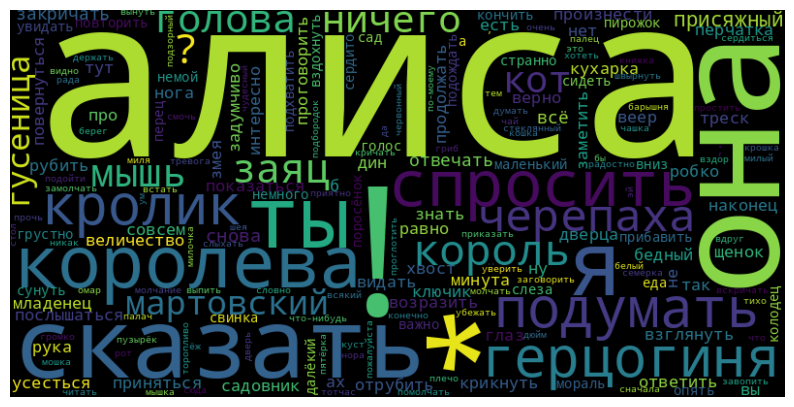

In [102]:
#Оставляем только слова, свойственные Алисе (а не свойственные контрольному корпусу)
alice_keywords_noref = alice_keywords[alice_keywords['Preference'] == 'corpus']

#Преобразуем датафрейм в словарь, с которым сможет работать модуль, строящий облако слов
data = alice_keywords_noref.set_index('Word').to_dict()['G2']

#Задаём облако слов
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

#Рисуем картинку
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Ключевые слова без контрольного корпуса

Есть большое количество методов, которые не требуют наличия контрольного корпуса. Это, с одной стороны, достоинство: такой корпус не надо собирать и аннотировать. С другой стороны, недостаток, есть хочется рассматривать текст не "в вакууме", а на фоне конкретного контекста.

Они могут опираться на более подсчёты по текстовому файлу или на большие языковые модели (правда, про них можно считать, что контрольный корпус "зашит" в саму модель).

Рассмотрим один методов, опирающийся на подсчёты по самому тексту, который называется YAKE (Yet Another Keyword Extractor). Он работает очень быстро и показывает достаточно точные результаты. 

In [103]:
%%capture

#Устанавливаем и импортируем модуль
!pip install yake
import yake

In [104]:
alice_preproc = preproc_simple(alice)

In [105]:
#Создаём функцию, извлекающую ключевые слова
#Язык выбираем русский (японский: ja, китайский: zh)
#Говорят, для китайского работает не так хорошо:(

extractor = yake.KeywordExtractor(lan='ru')

#Извлекаем ключевые слова
keywords = extractor.extract_keywords(alice_preproc)

#Печатаем их
for kw in keywords:
    print(kw)

('подумать бедный алиса', np.float64(9.297156900042735e-06))
('подумать алиса', np.float64(1.0622928085599186e-05))
('спросить алиса', np.float64(1.4400140197966571e-05))
('робко спросить алиса', np.float64(1.88710095493664e-05))
('спросить алиса соня', np.float64(2.1196248141265353e-05))
('алиса', np.float64(2.1641759319825673e-05))
('отвечать алиса', np.float64(3.145040749216442e-05))
('кролик заметить алиса', np.float64(3.254069960730085e-05))
('спросить алиса робко', np.float64(3.774201909873281e-05))
('досада подумать алиса', np.float64(4.08550463096818e-05))
('грустно подумать алиса', np.float64(4.281604191194197e-05))
('спросить мартовский заяц', np.float64(4.7163805178007936e-05))
('рискнуть спросить алиса', np.float64(4.966473451925996e-05))
('шёпотом спросить алиса', np.float64(5.737838965107679e-05))
('алиса встряхивать голова', np.float64(5.824202370946338e-05))
('отвечать алиса робко', np.float64(5.850919197917139e-05))
('алиса поднять глаз', np.float64(6.264508492008132e-

По умолчанию при извлечении ключевых слов библиотекой yake доступны ключевые словосочетания, а не только ключевые слова (в предыдущем методе так на самом деле тоже можно, но нужно отдельно добавить словосочетания и их частотность в таблицы). Как как можно видеть, так как некоторые фразы повторяются в тексте часто, их мы и получаем — и это, возможно, не идеальный результат. Укажем, что нас интересуют только одиночные ключевые слова.

In [111]:
extractor = yake.KeywordExtractor(lan='ru', n=1)
keywords = extractor.extract_keywords(alice_preproc)

for kw in keywords:
    print(kw)

('алиса', np.float64(2.1641759319825673e-05))
('спросить', np.float64(0.00045379968166391743))
('голова', np.float64(0.0004605879581665803))
('подумать', np.float64(0.0004918288477570575))
('королева', np.float64(0.0004957612442123907))
('знать', np.float64(0.0005706541166588155))
('свой', np.float64(0.000584981396554482))
('болванщик', np.float64(0.0007227875196023702))
('рука', np.float64(0.0009404811262954417))
('кролик', np.float64(0.0009503836696987876))
('король', np.float64(0.0009620969573668991))
('глаз', np.float64(0.0010790147210931712))
('герцогиня', np.float64(0.0011784685898900598))
('грифон', np.float64(0.0012356896610188134))
('говорить', np.float64(0.0012717841223726068))
('отвечать', np.float64(0.0012732260081054353))
('квази', np.float64(0.0013694204717630168))
('мышь', np.float64(0.0013909978398482196))
('слово', np.float64(0.0014758306039384054))
('ответить', np.float64(0.0015645956141494206))


Полученный результат в целом пересекается с предыдущим списком — и тоже довольно неплох. Вместе со словами выдаются значения метрики, характеризующей их важность. Обратите внимание: чем **меньше** цифра, которую мы видим, тем важнее слово.

Можно заметить, что в список выше не попали слова _я_, _ты_, знаки пунктуации и т. д. Это потому что в модуль встроено удаление стоп-слов. Этот список мы можем задать самостоятельно, например, сделать пустым:

In [110]:
extractor_with_stop = yake.KeywordExtractor(lan='ru', n=1, stopwords=[])
keywords_with_stop = extractor_with_stop.extract_keywords(alice_preproc)

for kw in keywords:
    print(kw)

('она', np.float64(2.3761562918195427e-05))
('алиса', np.float64(3.741405416618896e-05))
('что', np.float64(5.0323326814365954e-05))
('сказать', np.float64(9.242681891714758e-05))
('быть', np.float64(0.00011069844805756954))
('это', np.float64(0.00011452292433559336))
('как', np.float64(0.00015964695766701293))
('они', np.float64(0.00016799187101663204))
('всё', np.float64(0.00018421548722639055))
('так', np.float64(0.0002803639978433657))
('мочь', np.float64(0.0005596063104468358))
('только', np.float64(0.0006899621708368706))
('такой', np.float64(0.0007047766707937834))
('спросить', np.float64(0.0007092107308281417))
('голова', np.float64(0.0007195973218826491))
('подумать', np.float64(0.0007640832230061464))
('королева', np.float64(0.0007714226581253914))
('этот', np.float64(0.0008677246218383488))
('знать', np.float64(0.0008795270554759506))
('нет', np.float64(0.0008919575648389859))


Вероятно, в список попало чуть больше стоп-слов, чем мы хотим (хотя и не все возможные), — метод слишком чувствителен к ним и поэтому их удаляет.

Сделаем облако слов (без стоп-слов). Так как слов мы извлекли только двадцать, он будет не такой красивый. Но ничего не мешает извлечь и больше — если есть задача получить красивую картинку! Размер слова задаётся просто порядком, так как метрику отображать не слишком удобно из-за её небольшой величины.

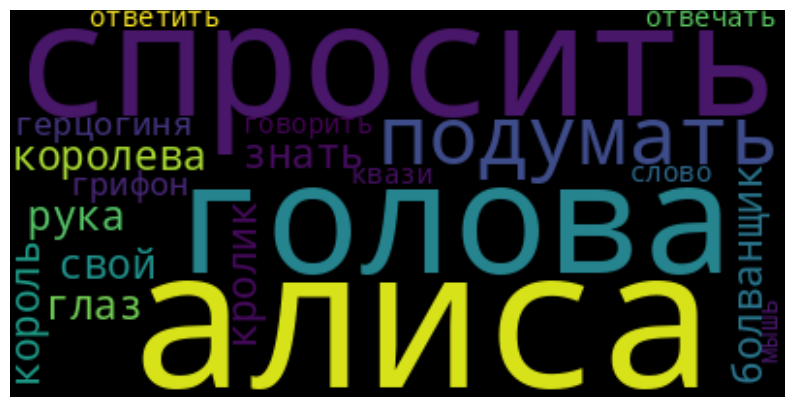

In [115]:
#Записываем ключевые слова в список
keywords_list = [kw for kw, _ in keywords] 
  
# Generate WordCloud 
wordcloud = WordCloud().generate(' '.join(keywords_list)) 
  
# Display the WordCloud 
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.show()